In [ ]:
import numpy as np 
import pandas as pd 

# text processing libraries
import re
import string
import nltk
from nltk.corpus import stopwords

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")


# Uploading train set and test set

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Training data
train = pd.read_csv('/content/drive/MyDrive/data/Train.csv')
test = pd.read_csv('/content/drive/MyDrive/data/Test.csv')
print('Train data shape: ', train.shape ,"and test data shape is",test.shape)


Train data shape:  (70000, 3) and test data shape is (30000, 2)


In [ ]:
train.sample(15,random_state=1)


,ID,text,label
6670,2ALVE9S,3idek mabrouk wsnine deyma mr le president,1
49567,F79SPUZ,ba3dek zayed,1
50796,KUJG65Q,thaanou ya twenssaa jma33eet ettebssi w rcd ra...,1
22310,ZFEJAUX,tres belle music mon frere,1
54037,JVWDYAR,chb 7achek ama 3onsourya ltahki aliha lbehi we...,-1
6869,XAXZYM5,ana mkachakh mais slim eryahi 3wen barchhh ca ...,1
13601,VI3S9OS,tawou tereb7ou el3aaaasssssbbbbaaaa,-1
3271,V36XWH5,farhanin barcha bichoix nabil oildna oi nosbro...,1
12647,ESHO33Q,je m appelle fersi mounir,0
13931,G3OLHTE,haka chna9esha l botoula 7ata hya ken bouzid,-1


In [ ]:
test.sample(15,random_state=1)

,ID,text
10747,NDPW3HP,alah yar7em omkom
12573,GXRZAGE,kol 3am winti 7aie bkhir wild 3ami si slim
29676,6783N40,enti sraft sraft karék chrit tour effel ya slo...
8856,IOYPDFJ,era2iss mouch ken t7awell el 3ayilt echahid 3a...
21098,J71HOMA,brave homme djafer bravo mr djafer de tizi ouzou
17458,OE1V7FS,wwwww belle chanson j adore
1476,VJVA15F,ena 3andi talab wa7id madhabeya traj3elna osem...
5120,0G7BAD0,andhaf wa achraf hezeb
18338,NLFS3SU,eli 9olt el kol s7i7 boss ena m3ak
28279,QKNKX6E,si thabthoub barra rajaa flous gaddafi wa saye...


# Data Visualisation

In [ ]:
# negative sentiments
negative_tweets = train[train['label']==-1]['text']
negative_tweets.values[2]

'bereau degage nathef ya slim walahi ya7chiw fih jma3a lem3amel 3lihom walah kit jib messi lana3mlou chay 7amlet nathafa fil bureaux ca jam3iya 3ari9a mel 3am 94 bdet da5la fi 7it choufelna hal mochkla belehi te5na9na mel fada tous les équipe mergine fina ken jit kifek walah maye5lsouch wi3adiw 3am jaych bech yetrabaw elkoura fi se9ik enti en9eth jam3iya ya slim wna3ref tnajim ta3melha'

In [ ]:
# positive sentiments
neutral_tweets = train[train['label']==1]['text']
neutral_tweets.values[5]

'mabrouk li tounes kolha bi monadhel felecitation congratulation auguri'

In [ ]:
# neutral sentiments
neutral_tweets = train[train['label']==0]['text']
neutral_tweets.values[4]


'slm brabi kifeh enajmo enbadlo meken alinti5ab'

In [ ]:
#Distribution of the label Column
print(train.label.value_counts())
#not a good distribution

 1    38239
-1    29295
 0     2466
Name: label, dtype: int64


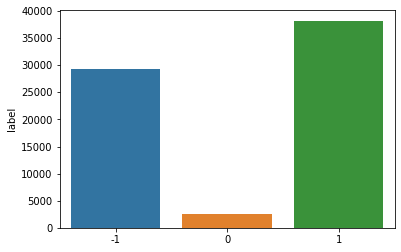

In [ ]:
#Using seaborn to visualize the #istribution of the label Column 
sns.barplot(train['label'].value_counts().index,train['label'].value_counts())

# data preprocessing

In [ ]:
#Missing values --> No missing values
train.isnull().sum()

ID       0
text     0
label    0
dtype: int64

In [ ]:
train
aux = pd.DataFrame()
aux["ID"] = train["ID"]
aux['text'] = train['text']
aux['label'] = train['label']


In [ ]:
indexNames = aux[ aux['label'] == 0 ].index
aux.drop(indexNames , inplace=True)

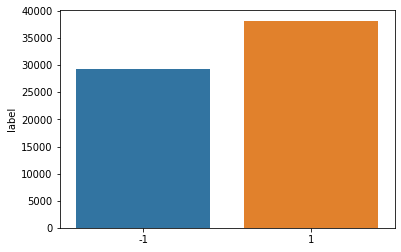

In [ ]:
sns.barplot(aux['label'].value_counts().index,aux['label'].value_counts())

In [ ]:
def remove_consec_duplicates(s):
    new_s = ""
    prev = ""
    for c in s:
        if len(new_s) == 0:
            new_s += c
            # print("if 1 new_s",new_s)
            prev = c
            #print("if 1 prev",prev)
        if c == prev : 
            continue
        else:
            new_s += c
            #print("if 2 new_s",new_s)
            prev = c
            #print("if 2 prev",prev)
    return new_s
# fonction tnaa7i l 7rouuf eli m3awdin consecutivement b khlef caractére h khatrou significatif pour "hhhhhh" qui exprime un sentiment positif parfois

In [ ]:
aux["text"]=aux['text'].apply(lambda x :remove_consec_duplicates(x))

In [ ]:
#train.compare(aux)

In [ ]:
def data_cleaning(text):
    text = text.lower() #Make text lowercase
    text = re.sub('\[.*?\]', '', text) #remove text in square brackets
    text = re.sub('https?://\S+|www\.\S+', '', text) #remove links
    text = re.sub('<.*?>+', '', text) #remove text in <...>
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) #remove punctuation
    text = re.sub('\n', '', text) #remove end of line character
    text = re.sub('3','a',text)
    text = re.sub('2','a',text)
    text = re.sub('4','dh',text)
    text = re.sub('5','kh',text)
    text = re.sub('7','h',text)
    text = re.sub('9','k',text)
    text = re.sub('8','gh',text)
    return text


In [ ]:
aux['text'] = aux['text'].apply(lambda x: data_cleaning(x)) 
test['text'] = test['text'].apply(lambda x: data_cleaning(x))

In [ ]:
aux.head()

,ID,text,label
0,13P0QT0,asba lek ou le seim riahi ou asba le ca,-1
1,SKCLXCJ,chaaeb feykelkoum menghir tahayoul ou kresi,-1
2,V1TVXIJ,bereau degage nathef ya slim walahi yahchiw fi...,-1
3,U0TTYY8,ak slouma,1
4,68DX797,entom titmanou lina ahna aid moubarik ahna cha...,-1


In [ ]:
aux["text"] = aux["text"].apply(lambda x: " ".join([w for w in x.split() if len(w)>2]))
#removing words whose length is less than 2

In [ ]:
#train.compare(aux)

In [ ]:
#size of vocabulary before preprocessing
corpus1 = ' '.join(list(train['text']))

print('Number of tokens before normalization:',len(set((corpus1.split(' ')))))

corpus2 = ' '.join(list(aux['text']))

print('Number of tokens after normalization:',len(set((corpus2.split(' ')))))

print("number of words dropped after normalization and preprocessing is",len(set((corpus1.split(' '))))-len(set((corpus2.split(' ')))))

Number of tokens before normalization: 144333
Number of tokens after normalization: 115076
number of words dropped after normalization and preprocessing is 29257


# separate cloud

In [ ]:
!pip install wordcloud

In [ ]:
import collections 
from collections import Counter
# afficher les mots les plus repétés pour les sentiments positifs
print("les mots les plus repétés pour les sentiments positifs",Counter(" ".join(aux["text"][aux["label"]==1]).split()).most_common(40))

# afficher les mots les plus repétés pour les sentiments négatifs
print("les mots les plus repétés pour les sentiments négatifs",Counter(" ".join(aux["text"][aux["label"]==-1]).split()).most_common(40))


les mots les plus repétés pour les sentiments positifs [('rabi', 6915), ('slim', 4333), ('bravo', 3519), ('maak', 2672), ('alah', 2180), ('slouma', 2053), ('kol', 1946), ('ala', 1547), ('mabrouk', 1508), ('maalem', 1349), ('eli', 1120), ('nchalah', 1073), ('dima', 1018), ('inchalah', 977), ('bech', 961), ('khir', 940), ('barcha', 929), ('aam', 862), ('ama', 806), ('men', 792), ('alik', 790), ('ken', 755), ('ahna', 733), ('riahi', 687), ('brabi', 652), ('tounes', 651), ('walah', 647), ('ena', 605), ('aala', 603), ('ana', 592), ('bon', 575), ('club', 551), ('ili', 531), ('haja', 530), ('les', 525), ('mak', 517), ('enti', 514), ('ahla', 505), ('min', 504), ('merci', 501)]
les mots les plus repétés pour les sentiments négatifs [('slim', 2619), ('ala', 2222), ('eli', 2049), ('bech', 1950), ('ken', 1860), ('rabi', 1548), ('men', 1328), ('kol', 1328), ('mala', 1163), ('hata', 1097), ('alah', 1071), ('bara', 1032), ('fih', 1023), ('ama', 994), ('ili', 975), ('enti', 968), ('tawa', 921), ('min'

In [ ]:
from collections import Counter
positifs=[]
négatifs=[]
for i in range(80):
    positifs.append((Counter(" ".join(aux["text"][aux["label"]==1]).split()).most_common(80))[i][0])
print(positifs)
for i in range(80):
    négatifs.append((Counter(" ".join(aux["text"][aux["label"]==-1]).split()).most_common(80))[i][0])
print(négatifs)



['rabi', 'slim', 'bravo', 'maak', 'alah', 'slouma', 'kol', 'ala', 'mabrouk', 'maalem', 'eli', 'nchalah', 'dima', 'inchalah', 'bech', 'khir', 'barcha', 'aam', 'ama', 'men', 'alik', 'ken', 'ahna', 'riahi', 'brabi', 'tounes', 'walah', 'ena', 'aala', 'ana', 'bon', 'club', 'ili', 'haja', 'les', 'mak', 'enti', 'ahla', 'min', 'merci', 'maa', 'saha', 'fil', 'rajel', 'hata', 'bien', 'wlh', 'tawa', 'bone', 'alina', 'patron', 'vive', 'nchala', 'wala', 'president', 'haka', 'fel', 'fih', 'mouch', 'chaab', 'yarhmou', 'mala', 'chay', 'kima', 'lkol', 'fik', 'est', 'tunis', 'inti', 'bos', 'maana', 'enchalah', 'hay', 'rak', 'wenti', 'nes', 'pour', 'dawla', 'tounis', 'wel']
['slim', 'ala', 'eli', 'bech', 'ken', 'rabi', 'men', 'kol', 'mala', 'hata', 'alah', 'bara', 'fih', 'ama', 'ili', 'enti', 'tawa', 'min', 'aala', 'wala', 'chay', 'tounes', 'mouch', 'fil', 'taw', 'brabi', 'barcha', 'haja', 'alik', 'chkoun', 'les', 'fel', 'kan', 'riahi', 'kif', 'ena', 'kima', 'khir', 'hal', 'flous', 'maa', 'aal', 'mtaa', 

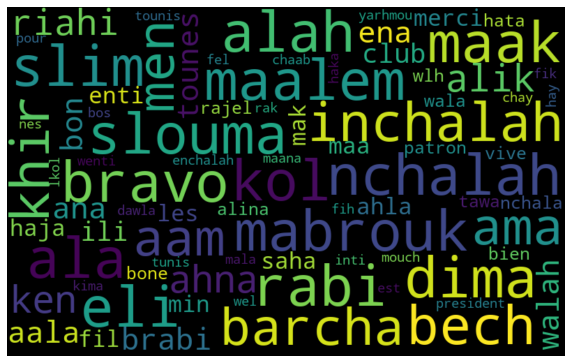

In [ ]:
#positive 
from wordcloud import WordCloud
positive_words =" ".join([text for text in positifs])
word_cloud = WordCloud(width=800,height=500,random_state=1,max_font_size=80).generate(positive_words)
plt.figure(figsize=(10,7))
plt.imshow(word_cloud,interpolation="bilinear")
plt.axis("off")
plt.show()

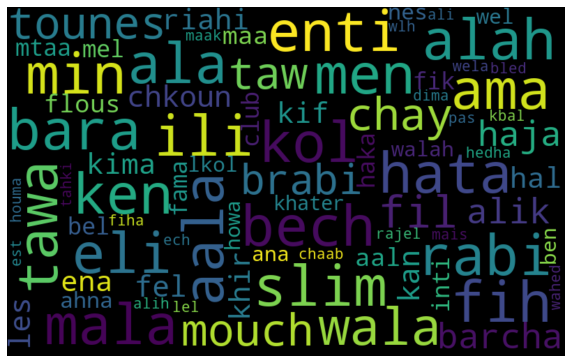

In [ ]:
#negative 
from wordcloud import WordCloud
négatifs_words =" ".join([text for text in négatifs])
word_cloud = WordCloud(width=800,height=500,random_state=1,max_font_size=80).generate(négatifs_words)
plt.figure(figsize=(10,7))
plt.imshow(word_cloud,interpolation="bilinear")
plt.axis("off")
plt.show()

**TUNIZIBERT**

In [ ]:
!pip install transformers 

     |████████████████████████████████| 4.0 MB 4.3 MB/s 
     |████████████████████████████████| 895 kB 48.1 MB/s 
     |████████████████████████████████| 596 kB 41.2 MB/s 
     |████████████████████████████████| 6.6 MB 28.8 MB/s 
     |████████████████████████████████| 77 kB 6.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import torch
if torch.cuda.is_available():       
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
Device name: Tesla K80


In [ ]:
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
pretrained_model= 'bert-base-uncased' 
tokenizer = BertTokenizer.from_pretrained(pretrained_model, do_lower_case=True)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
from keras.preprocessing.sequence import pad_sequences

def preprocessing_tweets_for_tunizibert(sentences,tokenizer,max_length=128):
  sentences = ["[CLS] " + text + " [SEP]" for text in sentences]
  tokenized_texts = [tokenizer.tokenize(sentence) for sentence in sentences]
  input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
  input_ids = pad_sequences(input_ids, maxlen=max_length, dtype="long", truncating="post", padding="post")
  attention_masks = []
  for seq in input_ids:
    seq_mask = [int(i>0) for i in seq]
    attention_masks.append(seq_mask)
    
  input_ids = torch.tensor(input_ids)
  attention_masks = torch.tensor(attention_masks)

  return input_ids,attention_masks

In [ ]:
labels = aux.label.values
sentences=aux.text.values

In [ ]:
def replace(labels):
  for i in range(len(labels)):
    if labels[i]==-1:
      labels[i]=labels[i]+1
  return labels

In [ ]:
sentences

array(['asba lek seim riahi asba',
       'chaaeb feykelkoum menghir tahayoul kresi',
       'bereau degage nathef slim walahi yahchiw fih jmaaa lemaamel alihom walah kit jib mesi lanaamlou chay hamlet nathafa fil bureaux jamaiya aarika mel aam kdh bdet dakhla hit choufelna hal mochkla belehi tekhnakna mel fada tous les équipe mergine fina ken jit kifek walah mayekhlsouch wiaadiw aam jaych bech yetrabaw elkoura sekik enti enketh jamaiya slim wnaaref tnajim taamelha',
       ..., 'winha nakhtabha', 'fachel enta houwa',
       'nchla lyouma nesmaou akhber bahiya ala jemaiya'], dtype=object)

In [ ]:
labels=replace(labels)

In [ ]:
input_ids,attention_masks= preprocessing_tweets_for_tunizibert(sentences,tokenizer,max_length=128)

In [ ]:
print(aux['text'][3])
print(input_ids[3])
print(attention_masks[3])

slouma
tensor([  101, 22889, 24778,  2050,   102,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0, 

In [ ]:
from sklearn.model_selection import train_test_split

train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels, 
                                                            random_state=2022, test_size=0.1)
train_masks, validation_masks, _, _ = train_test_split(attention_masks, input_ids,
                                             random_state=2022, test_size=0.1)

In [ ]:
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)

train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)

train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
batch_size = 32

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

**Bert Model for ClassificationTasks**

In [ ]:
%%time
import torch.nn as nn
from transformers import BertModel
class TUNIZIBertClassfier(nn.Module):# Create the TUNIZIBERTClassfier class
    def __init__(self, freeze_bert=False):
        super(TUNIZIBertClassfier, self).__init__()
        
        hidden_size_of_bert,hidden_size_of_Classfier,output =768,50,2
        
        self.bert = BertModel.from_pretrained('bert-base-uncased') 

        self.classifier = nn.Sequential( #classifaction layer
            nn.Linear(hidden_size_of_bert, hidden_size_of_Classfier),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(hidden_size_of_Classfier,output)
        )
        if freeze_bert: # Freeze the BERT model
            for param in self.bert.parameters():
                param.requires_grad = False         

        
    def forward(self, input_ids, attention_mask):
        # Feed input to BERT
        outputs = self.bert(input_ids=input_ids,attention_mask=attention_mask)
        #for classification extract the last hidden layer of the [CLS] token
        last_hidden_state_cls = outputs[0][:, 0, :]
        # Feed input to classifier to compute logits
        logits = self.classifier(last_hidden_state_cls)

        return logits

CPU times: user 0 ns, sys: 46 µs, total: 46 µs
Wall time: 51 µs


**hyper-parameters** **,Initialize the tunizibert Classifier**


In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup

def initialize_model(epochs=4):

    tunizibert_classifier = TUNIZIBertClassfier(freeze_bert=False)

    tunizibert_classifier.to(device) # Tell PyTorch to run the model on GPU

    optimizer = AdamW(tunizibert_classifier.parameters(),
                      lr=5e-5,
                      eps=1e-8)

    total_steps = len(train_dataloader) * epochs

    scheduler = get_linear_schedule_with_warmup(optimizer,
                                                num_warmup_steps=0, 
                                                num_training_steps=total_steps)
    return tunizibert_classifier, optimizer, scheduler

**Training**

In [ ]:
import random
import time

loss_fn = nn.CrossEntropyLoss() # Specify loss function

def set_seed(seed_value=42):
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)

def train(model, train_dataloader, val_dataloader=None, epochs=4, evaluation=False):
   
    print("Start training...\n")
    for epoch_i in range(epochs):
        print('            ======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
        print('\n')

        print(f"{'Batch':^7} | {'Train Loss':^12} | {'Val Loss':^10} | {'Val Acc':^9} | {'Elapsed':^9}")
        print("-"*70)

        t0_epoch, t0_batch = time.time(), time.time() # Measure the elapsed time of each epoch

        total_loss, batch_loss, batch_counts = 0, 0, 0 # Reset tracking variables at the beginning of each epoch

        model.train()

        # For each batch of training data...
        for step, batch in enumerate(train_dataloader):
            batch_counts +=1

            b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

            model.zero_grad()

            logits = model(b_input_ids, b_attn_mask)

            loss = loss_fn(logits, b_labels)
            batch_loss += loss.item()
            total_loss += loss.item()

            loss.backward()

            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            # Update parameters and the learning rate
            optimizer.step()
            scheduler.step()

            # Print the loss values and time elapsed for every 20 batches
            if (step % 20 == 0 and step != 0) or (step == len(train_dataloader) - 1):
                # Calculate time elapsed for 20 batches
                time_elapsed = time.time() - t0_batch

                print(f"{step:^7} | {batch_loss / batch_counts:^12.6f} | {'-':^10} | {'-':^9} | {time_elapsed:^9.2f}")

                batch_loss, batch_counts = 0, 0
                t0_batch = time.time()

        avg_train_loss = total_loss / len(train_dataloader)

        print("-"*70)
       
        if evaluation == True:
            
            val_loss, val_accuracy = evaluate(model, val_dataloader)

            time_elapsed = time.time() - t0_epoch
            
            print(f"{'-':^7} | {avg_train_loss:^12.6f} | {val_loss:^10.6f} | {val_accuracy:^9.2f} | {time_elapsed:^9.2f}")
            print("-"*70)
            print("\n")
            print(" val_accuracy: {0:.2f}".format(val_accuracy))

        print("\n")
    
    print("Training complete!")


def evaluate(model, val_dataloader):
    # Put the model into the evaluation mode. The dropout layers are disabled during
    model.eval()

    val_accuracy = []
    val_loss = []

    for batch in val_dataloader:
        b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)

        # Compute loss
        loss = loss_fn(logits, b_labels)
        val_loss.append(loss.item())

        # Get the predictions
        preds = torch.argmax(logits, dim=1).flatten()

        # Calculate the accuracy rate
        accuracy = (preds == b_labels).cpu().numpy().mean() * 100
        val_accuracy.append(accuracy)

    # Compute the average accuracy and loss over the validation set.
    val_loss = np.mean(val_loss)
    val_accuracy = np.mean(val_accuracy)

    return val_loss, val_accuracy

In [ ]:
set_seed(42)    # Set seed for reproducibility
tunizibert_classifier, optimizer, scheduler = initialize_model(epochs=3)
train(tunizibert_classifier, train_dataloader, validation_dataloader, epochs=3, evaluation=True)

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Start training...

            ======== Epoch 1 / 3 ========


 Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
  20    |   0.671049   |     -      |     -     |   26.04  
  40    |   0.635362   |     -      |     -     |   25.26  
  60    |   0.580474   |     -      |     -     |   25.01  
  80    |   0.571606   |     -      |     -     |   24.98  
  100   |   0.553410   |     -      |     -     |   24.87  
  120   |   0.490821   |     -      |     -     |   24.93  
  140   |   0.550754   |     -      |     -     |   24.85  
  160   |   0.518727   |     -      |     -     |   24.89  
  180   |   0.511618   |     -      |     -     |   24.89  
  200   |   0.511467   |     -      |     -     |   24.86  
  220   |   0.502466   |     -      |     -     |   24.91  
  240   |   0.469136   |     -      |     -     |   24.84  
  260   |   0.453035   |     -      |     -     |   24.88  
  280   |   0.451114   |  

Prediction

In [ ]:
import torch.nn.functional as F

def tunizibert_predict(model, test_dataloader):
    """Perform a forward pass on the trained BERT model to predict probabilities
    on the test set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()

    all_logits = []

    # For each batch in our test set...
    for batch in test_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask = tuple(t.to(device) for t in batch)[:2]

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)
        all_logits.append(logits)
    
    # Concatenate logits from each batch
    all_logits = torch.cat(all_logits, dim=0)

    # Apply softmax to calculate probabilities
    probs = F.softmax(all_logits, dim=1).cpu().numpy()

    return probs

In [ ]:
sentences_t=test.text.values
test_inputs, test_masks = preprocessing_tweets_for_tunizibert(sentences_t,tokenizer)

In [ ]:
test_data = TensorDataset(test_inputs, test_masks)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

In [ ]:
probs = tunizibert_predict(tunizibert_classifier, test_dataloader)


In [ ]:
probs

array([[0.8088243 , 0.19117571],
       [0.99559265, 0.00440729],
       [0.00470047, 0.99529946],
       ...,
       [0.08467861, 0.91532147],
       [0.995059  , 0.00494105],
       [0.00259315, 0.9974069 ]], dtype=float32)

In [ ]:
test_data = test['text']
test_id = test['ID']

data_test = pd.DataFrame(data = {'id' : test_id ,'text': test['text'], 'negative' : probs[:,0] ,'postive' : probs[:,1]  })

In [ ]:
data_test

,id,text,negative,postive
0,2DDHQW9,barcha aaindou fiha hak w barcha teflim kadhalik,0.808824,0.191176
1,5HY6UEY,ye gernabou ye kahba,0.995593,0.004407
2,ATNVUJX,saber w barra rabbi maak khouya,0.004700,0.995299
3,Q9XYVOQ,chaaébbb tahaaaaannnnnnnnnnn tfouuhh,0.981961,0.018039
4,TOAHLRH,rabi ykhalihoulek w yfarhek bih w inchallah it...,0.002517,0.997483
...,...,...,...,...
29995,NHXTL3R,me ihebekch raw,0.021306,0.978694
29996,U1YWB2O,nchallah rabi maak w iwafkek mais just habit n...,0.016430,0.983570
29997,O3KYLM0,slim rabi maak w ekhedem w khalli lhossed lemn...,0.084679,0.915321
29998,W4C38TY,bara khalis rouhik yizi mitbalait jamaiya hlak...,0.995059,0.004941


In [ ]:
test1=[' ma5yebha el3icha fi tunes','bravo mahleeek y behi nhebek barcha','bara nik omek','9ahba',
       'eb3edni zebi rani mkarez','nakrheek y kaleb','manich farhan bel service mte3kom','rabi m3akom','fadetni rak']
sentences_t1=test1
test_inputs1, test_masks1 = preprocessing_tweets_for_tunizibert(sentences_t1,tokenizer)
test_data1= TensorDataset(test_inputs1, test_masks1)
test_sampler1= SequentialSampler(test_data1)
test_dataloader1= DataLoader(test_data1, sampler=test_sampler1, batch_size=batch_size)
probs1 = tunizibert_predict(tunizibert_classifier, test_dataloader1)


In [ ]:
probs1

array([[9.91378903e-01, 8.62111337e-03],
       [9.44328378e-04, 9.99055684e-01],
       [9.95616794e-01, 4.38317098e-03],
       [9.92258847e-01, 7.74111412e-03],
       [9.85571504e-01, 1.44284805e-02],
       [9.95480299e-01, 4.51965909e-03],
       [9.91831243e-01, 8.16876348e-03],
       [2.51953467e-03, 9.97480452e-01],
       [2.11453468e-01, 7.88546503e-01]], dtype=float32)

In [ ]:
import pickle
with open('pcdtunizibert_pkl', 'wb') as files:
    pickle.dump(tunizibert_classifier, files)



In [ ]:
import pickle
with open('pcdtunizibert_pkl.pkl', 'wb') as files:
    pickle.dump(tunizibert_classifier, files)

In [ ]:
# load saved model
with open('pcdtunizibert_pkl.pkl' , 'rb') as f:
  newbert = pickle.load(f)

In [ ]:
# load saved model
with open('pcdtunizibert_pkl' , 'rb') as f:
  newbert = pickle.load(f)

In [ ]:
newbert

TUNIZIBertClassfier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affin